<a href="https://colab.research.google.com/github/shihyuanwang/NYC_PropertySalePriceAnalysis/blob/main/NYC_Property_Sale_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NYC Property Price Analysis

We are working to understand selling prices for properties in New York City during 2016 and 2017. Focus will be placed on understanding those price by borough and building class category.
We will also build a regression model to predict prices based on various factors.

In [ ]:
# Load the appropriate Python libraries.
import pandas as pd
import numpy as np
from datetime import date 
import seaborn as sns   # for viz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Access the Data

In [ ]:
# Read the CSV file into a dataframe.
url = 'http://bit.ly/home-sales-data'
df_homes = pd.read_csv(url)

In [ ]:
# Calculate the dimensions of the data.
df_homes.shape

(67638, 22)

In [ ]:
df_homes.info()
# Problem: "LAND/GROSS SQUARE FEET" and "SALE PRICE" should be numerical, and "SALE DATE" should be date type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67638 entries, 0 to 67637
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID                              67638 non-null  int64 
 1   BOROUGH                         67638 non-null  int64 
 2   NEIGHBORHOOD                    67638 non-null  object
 3   BUILDING CLASS CATEGORY         67638 non-null  object
 4   TAX CLASS AT PRESENT            67638 non-null  object
 5   BLOCK                           67638 non-null  int64 
 6   LOT                             67638 non-null  int64 
 7   EASE-MENT                       67638 non-null  object
 8   BUILDING CLASS AT PRESENT       67638 non-null  object
 9   ADDRESS                         67638 non-null  object
 10  APARTMENT NUMBER                67638 non-null  object
 11  ZIP CODE                        67638 non-null  int64 
 12  RESIDENTIAL UNITS               67638 non-null

In [ ]:
# Preview the first few records in the data.
df_homes.head(10)

,ID,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,SALE PRICE
0,0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,7/19/2017 0:00,6625000
1,1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,12/14/2016 0:00,-
2,2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,12/9/2016 0:00,-
3,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,11/17/2016 0:00,8000000
4,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,10009,20,0,20,2581,9730,1900,2,C4,7/20/2017 0:00,-
5,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,9/23/2016 0:00,3192840
6,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,10009,44,2,46,5163,21007,1900,2,C7,7/20/2017 0:00,-
7,9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,11/7/2016 0:00,16232000
8,10,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,394,44,,D7,181 AVENUE C,,10009,30,4,34,4295,21328,1910,2,D7,7/20/2017 0:00,-
9,12,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,-,-,1920,2,C6,9/6/2016 0:00,1


## Data Cleaning
We clean the data to prepare for analysis, including dropping some unnecessary columns and duplicated or null value records, identifying and removing outliers and unreasonable records, and replacing categorical values with the meaningful name.


In [ ]:
# Drop unnecessary columns (EASE-MENT is empty.)
df_homes = df_homes.drop(columns=['ID','EASE-MENT'])

In [ ]:
# Convert selected columns into the appropriate data type.
# error='coerce': invalid parsing will be set as NaN.
df_homes['LAND SQUARE FEET'] = pd.to_numeric(df_homes['LAND SQUARE FEET'], errors='coerce') 
df_homes['GROSS SQUARE FEET'] = pd.to_numeric(df_homes['GROSS SQUARE FEET'], errors='coerce')
df_homes['SALE PRICE'] = pd.to_numeric(df_homes['SALE PRICE'], errors='coerce')
df_homes['SALE DATE'] = pd.to_datetime(df_homes['SALE DATE'], errors='coerce')

In [ ]:
# Check datatype to confirm conversions were successful.
df_homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67638 entries, 0 to 67637
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         67638 non-null  int64         
 1   NEIGHBORHOOD                    67638 non-null  object        
 2   BUILDING CLASS CATEGORY         67638 non-null  object        
 3   TAX CLASS AT PRESENT            67638 non-null  object        
 4   BLOCK                           67638 non-null  int64         
 5   LOT                             67638 non-null  int64         
 6   BUILDING CLASS AT PRESENT       67638 non-null  object        
 7   ADDRESS                         67638 non-null  object        
 8   APARTMENT NUMBER                67638 non-null  object        
 9   ZIP CODE                        67638 non-null  int64         
 10  RESIDENTIAL UNITS               67638 non-null  int64         
 11  CO

In [ ]:
# Determine if there are any null values.
df_homes.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  21085
GROSS SQUARE FEET                 22166
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE DATE                             0
SALE PRICE                        11702
dtype: int64

In [ ]:
# Drop the records with null values
df_homes = df_homes.dropna()
print(df_homes.isnull().sum()) # only need to use print() if we want to print multiple outputs
print(df_homes.shape)

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE DATE                         0
SALE PRICE                        0
dtype: int64
(38543, 20)


In [ ]:
# Count the number of duplicated rows
# print(df_homes.columns)
sum(df_homes.duplicated(df_homes.columns))

233

In [ ]:
# Delete the duplicated rows
df_homes = df_homes.drop_duplicates(df_homes.columns, keep='last') # 'last': consider last value as unique and rest of the same values as duplicate
sum(df_homes.duplicated(df_homes.columns))

0

In [ ]:
# Generate descriptive statistics
df_homes.describe()
# To explore some errors and understand the data

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,38310.000000,38310.000000,38310.000000,38310.000000,38310.000000,38310.000000,38310.000000,3.831000e+04,3.831000e+04,38310.000000,38310.000000,3.831000e+04
mean,3.250457,4994.188149,233.516628,10938.759149,2.597338,0.261028,2.877760,3.380296e+03,3.706223e+03,1828.401644,1.474889,1.213164e+06
std,0.902514,3430.154208,494.964350,1079.285705,18.252264,12.120226,22.039185,3.394932e+04,3.198479e+04,462.968094,0.833394,1.490067e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,3.000000,2222.250000,21.000000,10469.000000,1.000000,0.000000,1.000000,1.407000e+03,8.200000e+02,1920.000000,1.000000,9.500000e+04
50%,3.000000,4669.000000,45.000000,11217.000000,1.000000,0.000000,1.000000,2.133000e+03,1.620000e+03,1931.000000,1.000000,4.830000e+05
75%,4.000000,6997.000000,94.000000,11237.000000,2.000000,0.000000,2.000000,3.050000e+03,2.515000e+03,1960.000000,2.000000,8.349912e+05
max,5.000000,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [ ]:
# Remove properties with 0's in the "SALE PRICE"
df_homes = df_homes[df_homes['SALE PRICE'] > 0]
df_homes.shape

(30228, 20)

At this point, we will remove any properties where the year built was set to 0. Based on conversation with XX, anytime 0 was input as the year built, it was due to a lack of available data.

In [ ]:
# Remove properties that have 0s as the "YEAR BUILT"
df_homes = df_homes[df_homes['YEAR BUILT'] > 0]
df_homes.shape

(28773, 20)

In [ ]:
# Add a new column and calculate building age
print(date.today().year) 
df_homes['BUILDING AGE'] = date.today().year - df_homes['YEAR BUILT']
df_homes['BUILDING AGE'].head()

2021


0     121
3     121
5     101
7     101
17     93
Name: BUILDING AGE, dtype: int64

In [ ]:
# Remove properties whose SQUARE FEET is greater than 10K 
# (from business/case understanding)
df_homes = df_homes[df_homes['LAND SQUARE FEET'] < 10000]
df_homes = df_homes[df_homes['GROSS SQUARE FEET'] < 10000]
df_homes.shape

(27603, 21)

In [ ]:
# Replace the 'BOROUGH' number with the actual name of the borough
df_homes['BOROUGH'] = df_homes['BOROUGH'].replace([1,2,3,4,5], 
                                                  ['Manhattan','Bronx','Brooklyn','Queens','Staten Island'])
df_homes['BOROUGH'].head()

0      Manhattan
3      Manhattan
5      Manhattan
138    Manhattan
139    Manhattan
Name: BOROUGH, dtype: object

In [ ]:
# Calculate the number of distinct values
df_homes['BOROUGH'].value_counts()

Brooklyn         11098
Queens            8609
Staten Island     3805
Bronx             3615
Manhattan          476
Name: BOROUGH, dtype: int64

In [ ]:
# Create a pivot table
homes_pivot = pd.pivot_table(df_homes, 
                             index=['BUILDING CLASS CATEGORY'], 
                             columns=['BOROUGH'], 
                             values=['SALE PRICE']) # default: average
homes_pivot                            
# pd.pivot_table(df_homes, index=['BOROUGH'], values=['SALE PRICE'], aggfunc=[np.sum, np.mean, np.median])

SALE PRICE  ...               
BOROUGH                                              Bronx  ...  Staten Island
BUILDING CLASS CATEGORY                                     ...               
01 ONE FAMILY DWELLINGS                       4.099764e+05  ...  463836.830585
02 TWO FAMILY DWELLINGS                       4.710390e+05  ...  547970.960357
03 THREE FAMILY DWELLINGS                     5.127755e+05  ...  454822.705882
04 TAX CLASS 1 CONDOS                         3.880524e+05  ...            NaN
05 TAX CLASS 1 VACANT LAND                    2.168333e+06  ...  560291.000000
06 TAX CLASS 1 - OTHER                        2.494444e+05  ...  363000.000000
07 RENTALS - WALKUP APARTMENTS                9.548861e+05  ...  724826.421053
08 RENTALS - ELEVATOR APARTMENTS              3.340000e+06  ...            NaN
09 COOPS - WALKUP APARTMENTS                  1.113660e+05  ...            NaN
10 COOPS - ELEVATOR APARTMENTS                2.663088e+05  ...            NaN
11A CONDO-RENTALS                                      NaN  ...            NaN
12 CONDOS - WALKUP APARTMENTS                 2.476874e+05  ...            NaN
13 CONDOS - ELEVATOR APARTMENTS               4.841495e+05  ...            NaN
14 RENTALS - 4-10 UNIT                        8.088947e+05  ...  915000.000000
15 CONDOS - 2-10 UNIT RESIDENTIAL                      NaN  ...            NaN
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT             NaN  ...            NaN
17 CONDO COOPS                                1.259690e+05  ...            NaN
21 OFFICE BUILDINGS                           1.121417e+06  ...  586080.000000
22 STORE BUILDINGS                            1.397977e+06  ...  713682.740741
23 LOFT BUILDINGS                             2.075000e+06  ...            NaN
26 OTHER HOTELS                                        NaN  ...            NaN
27 FACTORIES                                  7.999998e+05  ...  290000.000000
28 COMMERCIAL CONDOS                                   NaN  ...            NaN
29 COMMERCIAL GARAGES                         8.716604e+05  ...  532900.000000
30 WAREHOUSES                                 1.488556e+06  ...  394000.000000
31 COMMERCIAL VACANT LAND                              NaN  ...            NaN
32 HOSPITAL AND HEALTH FACILITIES             9.750000e+05  ...            NaN
33 EDUCATIONAL FACILITIES                              NaN  ...            NaN
35 INDOOR PUBLIC AND CULTURAL FACILITIES               NaN  ...  395000.000000
37 RELIGIOUS FACILITIES                       4.963600e+05  ...  303410.000000
38 ASYLUMS AND HOMES                          1.850000e+06  ...            NaN
39 TRANSPORTATION FACILITIES                           NaN  ...            NaN
41 TAX CLASS 4 - OTHER                        4.355620e+05  ...            NaN
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC              NaN  ...            NaN
43 CONDO OFFICE BUILDINGS                     3.527254e+06  ...            NaN
44 CONDO PARKING                              4.175000e+04  ...            NaN
45 CONDO HOTELS                                        NaN  ...            NaN
46 CONDO STORE BUILDINGS                      8.949517e+06  ...            NaN
47 CONDO NON-BUSINESS STORAGE                 7.500000e+03  ...            NaN
48 CONDO TERRACES/GARDENS/CABANAS                      NaN  ...            NaN
49 CONDO WAREHOUSES/FACTORY/INDUS                      NaN  ...            NaN

[41 rows x 5 columns]

Export the pivot table analysis and download it.

In [ ]:
# Export the pivot table to a csv file
from google.colab import files
homes_pivot.to_csv('Prices by borough.csv')
files.download('Prices by borough.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis
Explore the data pattern, the relationship between sale prices and other variables, and correlation between variables.

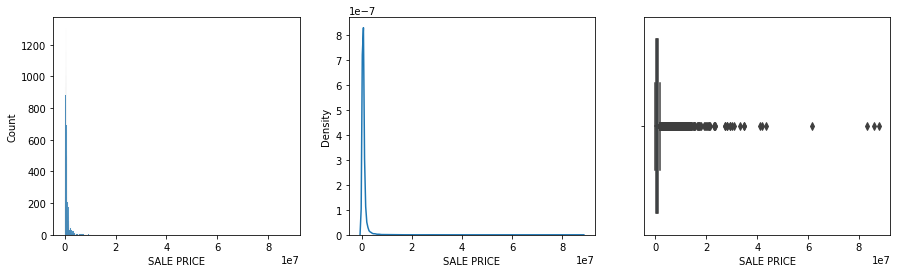

In [ ]:
# Review the distribution of home prices (library 'seaborn')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
sns.histplot(df_homes, x='SALE PRICE', ax=ax1);  #; remove unnecessary outputs
sns.kdeplot(data=df_homes, x='SALE PRICE', ax=ax2);  
sns.boxplot(data=df_homes, x='SALE PRICE', ax=ax3);  

In [ ]:
# Calculate the interquartile range (IQR) for the "SALE PRICE" to identify outliers
Q1 = df_homes['SALE PRICE'].quantile(0.25)
Q3 = df_homes['SALE PRICE'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

515000.0


In [ ]:
# Remove outliers based on the IQR
# Anything outside of this range should be removed: (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR)
df_homes = df_homes[~((df_homes['SALE PRICE'] < (Q1-1.5*IQR)) | (df_homes['SALE PRICE'] > (Q3+1.5*IQR)))]
df_homes.shape                  

(25414, 21)

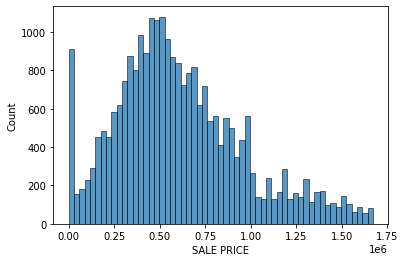

In [ ]:
# Recreate the distribution of home prices (outliers were removed)
# sns.displot(df_homes, x='SALE PRICE', kind='kde');  # Does no work on kaggle
sns.histplot(df_homes, x='SALE PRICE'); 
# sns.kdeplot(data=df_homes, x='SALE PRICE');  

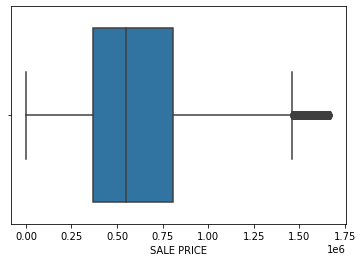

In [ ]:
# Recreate the boxplot of home prices (outliers were removed)
sns.boxplot(data=df_homes, x='SALE PRICE')

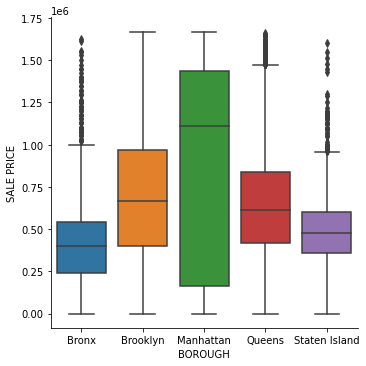

In [ ]:
# Generate a boxplot showing the distribution of sale price by borough
sns.catplot(x="BOROUGH", y="SALE PRICE", kind="box", data=df_homes,
            order=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']);

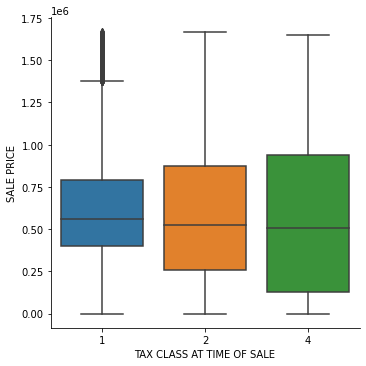

In [ ]:
# Generate a boxplot showing the distribution of sale price by tax class at time of sale
sns.catplot(x="TAX CLASS AT TIME OF SALE", y="SALE PRICE", kind="box", data=df_homes);

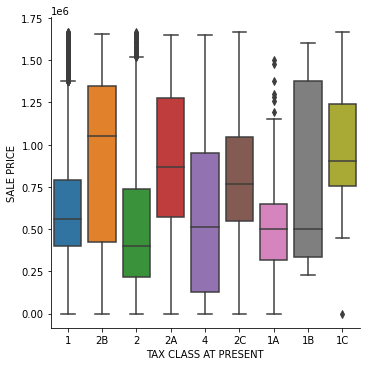

In [ ]:
# Generate a boxplot showing the distribution of sale price by tax class at present
sns.catplot(x="TAX CLASS AT PRESENT", y="SALE PRICE", kind="box", data=df_homes);

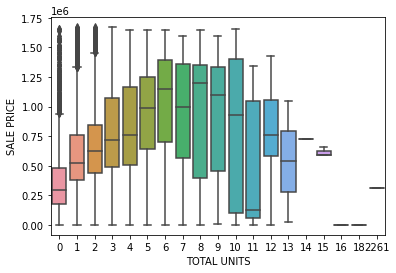

In [ ]:
# Generate a boxplot showing the relationship between sale price and total units
# sns.boxplot(x="RESIDENTIAL UNITS", y="SALE PRICE", data=df_homes);
# sns.boxplot(x="COMMERCIAL UNITS", y="SALE PRICE", data=df_homes);
sns.boxplot(x="TOTAL UNITS", y="SALE PRICE", data=df_homes); 

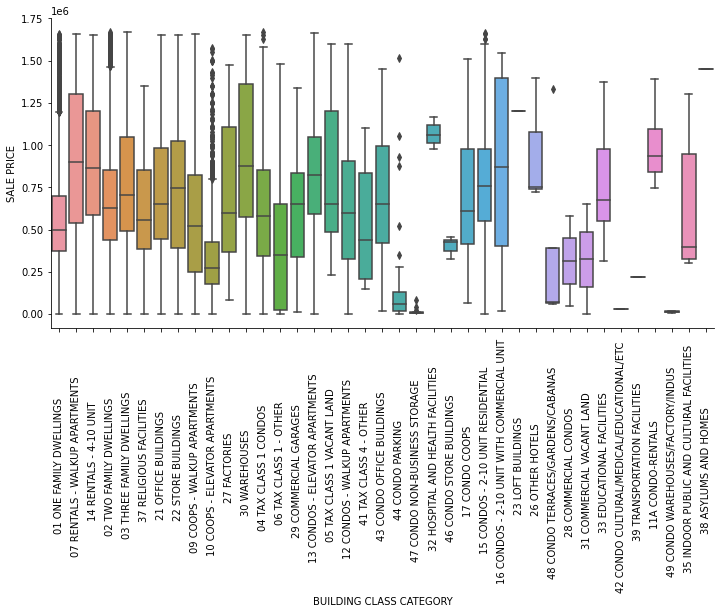

In [ ]:
# Generate a boxplot showing the distribution of sale price by building class category
# sns.catplot(x="BUILDING CLASS CATEGORY", y="SALE PRICE", kind="box", data=df_homes);
g = sns.catplot(x="BUILDING CLASS CATEGORY", y="SALE PRICE", kind="box", data=df_homes);
g.set_xticklabels(rotation=90)
g.fig.set_figwidth(25)

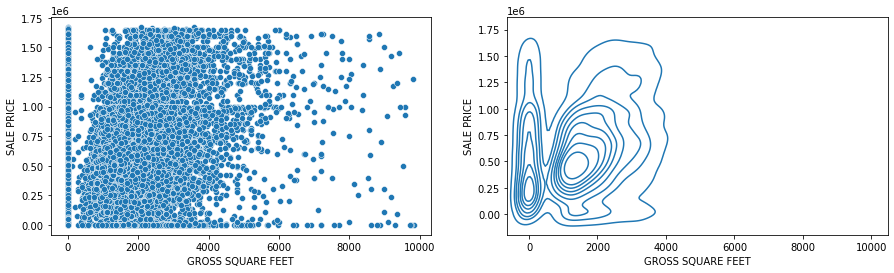

In [ ]:
# Generate a plot to show the relationship between sale price and gross square
# sns.displot(data=df_homes, x='GROSS SQUARE FEET', y='SALE PRICE', kind='kde');  # Does no work kaggle
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
sns.scatterplot(data=df_homes, x='GROSS SQUARE FEET', y='SALE PRICE', ax=ax1); 
sns.kdeplot(data=df_homes, x='GROSS SQUARE FEET', y='SALE PRICE', ax=ax2);   # show the concentration

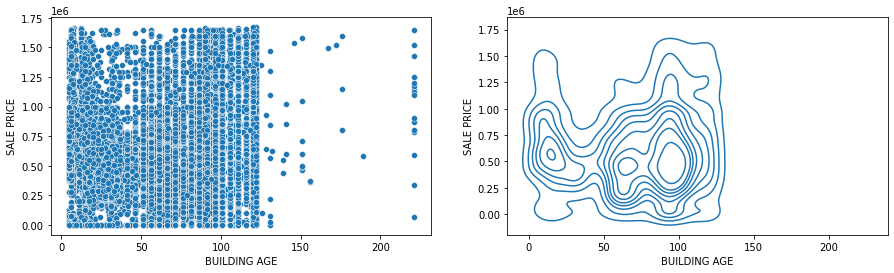

In [ ]:
# Generate a plot to show the relationship between sale price and building age
# sns.displot(data=df_homes, x='BUILDING AGE', y='SALE PRICE', kind='kde');  # Does no work kaggle
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
sns.scatterplot(data=df_homes, x='BUILDING AGE', y='SALE PRICE', ax=ax1); 
sns.kdeplot(data=df_homes, x='BUILDING AGE', y='SALE PRICE', ax=ax2);   # show the concentration
# This suggestion location is more relevant than building age - "location"

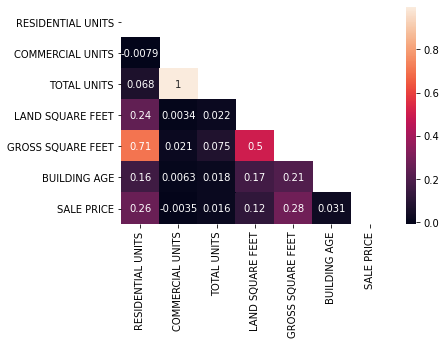

In [ ]:
# Show the correlation between variables
corr_columns = df_homes[["RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET",
                         "GROSS SQUARE FEET", "BUILDING AGE", "SALE PRICE"]]
corr = corr_columns.corr()
sns.heatmap(corr, mask=np.triu(corr), annot=True);

## Prepare the Data for Machine Learning
Prepare the data that will be used in machine learning model(s), including selecting important variables, creating dummy variables for categorical variables, and splitting the data into training and test data sets. We will build a regression model to predict prices based on various factors.


In [ ]:
# Select which columns to include in the model
model_columns = df_homes[["BOROUGH",
                          "BUILDING CLASS CATEGORY",
                          "RESIDENTIAL UNITS",
                          "COMMERCIAL UNITS",
                          "LAND SQUARE FEET",
                          "GROSS SQUARE FEET",
                          "BUILDING AGE", 
                          "SALE PRICE"]]
model_columns.head()
# Need to encode the categorical variables                    

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING AGE,SALE PRICE
167,Manhattan,01 ONE FAMILY DWELLINGS,1,0,1588.0,5653.0,121,10.0
175,Manhattan,07 RENTALS - WALKUP APARTMENTS,9,0,1566.0,6330.0,120,1583840.0
176,Manhattan,07 RENTALS - WALKUP APARTMENTS,9,0,1566.0,6330.0,120,416790.0
177,Manhattan,07 RENTALS - WALKUP APARTMENTS,9,0,1566.0,6330.0,120,630370.0
855,Manhattan,14 RENTALS - 4-10 UNIT,6,1,2500.0,9835.0,131,10.0


In [ ]:
# Encode the categorical variables: create dummy variables  
model_columns = pd.get_dummies(model_columns,
                               columns=["BOROUGH", "BUILDING CLASS CATEGORY"],
                               prefix=["B","C"])
model_columns.head()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING AGE,SALE PRICE,B_Bronx,B_Brooklyn,B_Manhattan,B_Queens,B_Staten Island,C_01 ONE FAMILY DWELLINGS,C_02 TWO FAMILY DWELLINGS,C_03 THREE FAMILY DWELLINGS,C_04 TAX CLASS 1 CONDOS,C_05 TAX CLASS 1 VACANT LAND,C_06 TAX CLASS 1 - OTHER,C_07 RENTALS - WALKUP APARTMENTS,C_09 COOPS - WALKUP APARTMENTS,C_10 COOPS - ELEVATOR APARTMENTS,C_11A CONDO-RENTALS,C_12 CONDOS - WALKUP APARTMENTS,C_13 CONDOS - ELEVATOR APARTMENTS,C_14 RENTALS - 4-10 UNIT,C_15 CONDOS - 2-10 UNIT RESIDENTIAL,C_16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,C_17 CONDO COOPS,C_21 OFFICE BUILDINGS,C_22 STORE BUILDINGS,C_23 LOFT BUILDINGS,C_26 OTHER HOTELS,C_27 FACTORIES,C_28 COMMERCIAL CONDOS,C_29 COMMERCIAL GARAGES,C_30 WAREHOUSES,C_31 COMMERCIAL VACANT LAND,C_32 HOSPITAL AND HEALTH FACILITIES,C_33 EDUCATIONAL FACILITIES,C_35 INDOOR PUBLIC AND CULTURAL FACILITIES,C_37 RELIGIOUS FACILITIES,C_38 ASYLUMS AND HOMES,C_39 TRANSPORTATION FACILITIES,C_41 TAX CLASS 4 - OTHER,C_42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,C_43 CONDO OFFICE BUILDINGS,C_44 CONDO PARKING,C_46 CONDO STORE BUILDINGS,C_47 CONDO NON-BUSINESS STORAGE,C_48 CONDO TERRACES/GARDENS/CABANAS,C_49 CONDO WAREHOUSES/FACTORY/INDUS
167,1,0,1588.0,5653.0,121,10.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
175,9,0,1566.0,6330.0,120,1583840.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
176,9,0,1566.0,6330.0,120,416790.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177,9,0,1566.0,6330.0,120,630370.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
855,6,1,2500.0,9835.0,131,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Separate the dependent variable (y) from independent variables (x)
x = model_columns.drop(columns=["SALE PRICE"])
y = model_columns["SALE PRICE"]

In [ ]:
# Pull out some of the training data (30%) and create a test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Machine Learning Model: Linear Regression
Build a regression model to predict sale prices based on selected factors.

In [ ]:
# Train the prediction model using the training data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Display the y-intercept and coefficients of our regression model (y = b + mx)
print(model.intercept_)
print(model.coef_)

396754.0921440468
[-4.72871853e+04 -2.91381906e+02  3.19704110e+01  1.10426177e+02
  3.65872809e+01 -1.92339013e+05  1.04172509e+05  1.91916591e+05
  2.56684809e+04 -1.29418568e+05 -4.24218592e+04  2.82734929e+04
  1.13199999e+05  2.51034753e+05  1.51408093e+05  1.87049651e+05
  1.71705281e+05  9.83083658e+04 -6.04946259e+04  4.17894393e+05
  2.38740910e+05  4.05932992e+05  4.82756414e+04  3.31314204e+05
  4.23516814e+05  1.33177102e+05 -6.45579828e+04 -1.25480264e+04
  1.03575568e+05  2.27055870e+05 -2.48596588e+05 -1.87272656e+05
 -1.08087953e+05 -6.21510425e+04 -1.16415322e-10  1.09239574e+05
 -4.90635616e+04 -1.54273583e+05 -2.67207410e+05  2.91038305e-11
 -4.71560058e+05 -3.27170817e+04 -4.71438824e+05  2.25931794e+05
 -3.74417107e+05  3.49875736e+04 -4.90008603e+05 -1.17766287e+05
 -4.86038824e+05]
